In [1]:
import os
from os.path import abspath
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set working directory
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/ubuntu/master_thesis'

In [3]:
from src.Fundus import Fundus

In [4]:
# Paths
data_path = abspath("/mnt/data/ukbb/")

In [5]:
# Read metadata
ukbb = pd.read_csv("./data/ukbb_metadata.csv")

In [6]:
# Read stats per image
stats = pd.read_csv("./out/ukbb_rgb_stats_masked.csv")
stats.head()

,file,min_r,min_g,min_b,max_r,max_g,max_b,med_r,med_g,med_b,mea_r,mea_g,mea_b,std_r,std_g,std_b
0,1000180_21015_0_0.png,0,0,0,223,242,255,22.0,88.0,194.0,25.174331,82.805853,172.998585,21.721514,34.387801,60.383964
1,1000180_21016_0_0.png,0,0,0,208,255,255,21.0,77.0,162.0,22.420224,76.521969,155.850751,14.249997,28.914956,55.466586
2,1000303_21015_1_0.png,0,0,0,249,249,250,8.0,32.0,53.0,12.279264,33.896015,50.662893,12.049570,14.557493,25.592769
3,1000303_21016_1_0.png,0,0,0,250,250,250,1.0,18.0,46.0,2.187218,17.386409,43.349112,3.372666,9.122633,19.420419
4,1000390_21015_1_0.png,0,0,0,206,248,255,30.0,135.0,255.0,31.119729,132.807792,244.459799,9.970083,30.922325,47.720017


## Remove Dark images

14688
0.0839381436229184


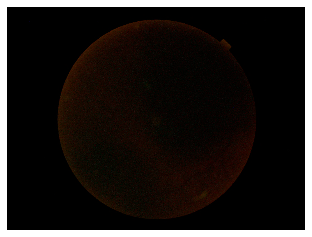

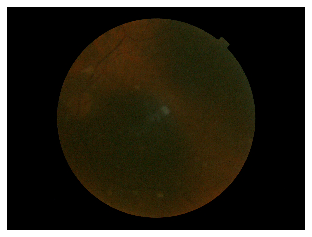

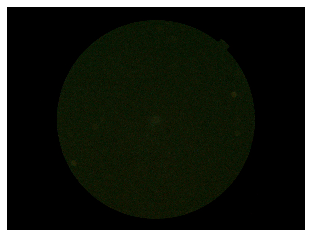

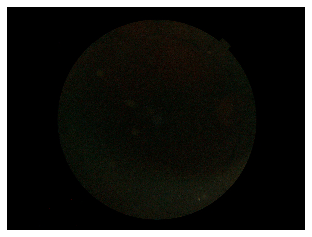

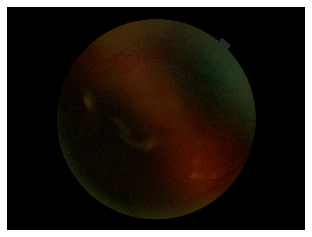

In [7]:
# Let's remove the very dar images, for this
# I'm using the mean value for the blue channel
# to calculate a lowerbound 
lb  = 50
print(stats[stats.mea_b < lb].shape[0])
print(stats[stats.mea_b < lb].shape[0]/ukbb.shape[0])

for i in stats[stats.mea_b < lb].file.sample(n=5):
    x = Fundus(f"{data_path}/{i}")
    x.show()

## Remove Bright images

5362
0.03064245139611169


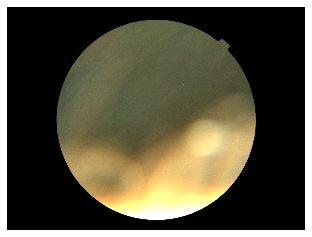

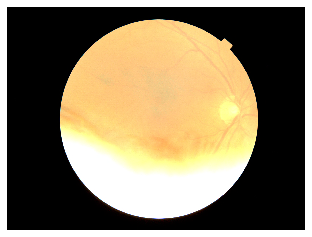

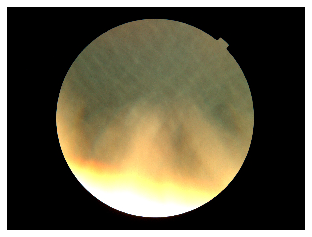

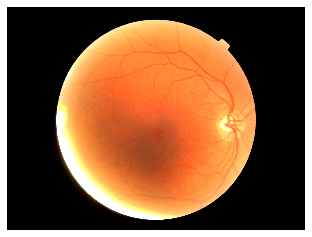

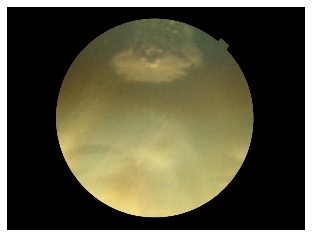

In [8]:
# For the very light images 
# I'm using the mean value for the red channel
# to calculate an upper-bound
ub = 70
print(stats[stats.mea_r > ub].shape[0])
print(stats[stats.mea_r > ub].shape[0]/ukbb.shape[0])

for i in stats[stats.mea_r > ub].file.sample(n=5):
    x = Fundus(f"{data_path}/{i}")
    x.show()

In [9]:
# Keep everything that is not too dark or too light
keep  = stats[~((stats.mea_b < lb) | (stats.mea_r > ub))]
print(keep.shape[0])
print(keep.shape[0]/ukbb.shape[0])

154931
0.8853908312665013


In [10]:
drop = stats[((stats.mea_b < lb) | (stats.mea_r > ub))]
print(drop.shape[0])
print(drop.shape[0]/ukbb.shape[0])

20050
0.11458059501903009


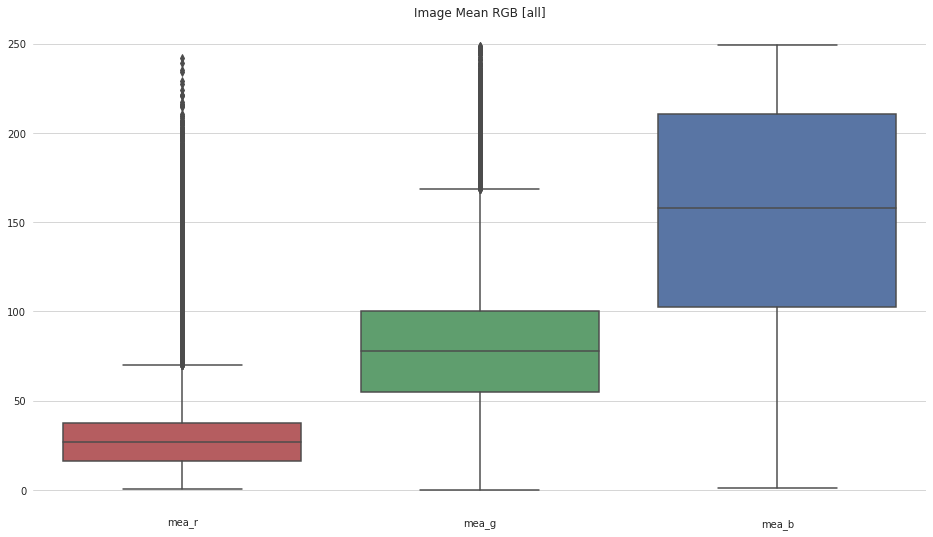

In [11]:
pal = sns.color_palette("deep")
sns.set_palette([pal[3],pal[2],pal[0]])
sns.set_style("whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16,9))
sns.boxplot(data=stats[["mea_r","mea_g","mea_b"]])
ax.set_title("Image Mean RGB [all]")
sns.despine(left=True, bottom=True)
f.savefig(abspath("./out/figures/stats_thr-mean-all.png"))
f.savefig(abspath("./out/figures/stats_thr-mean-all.svg"))

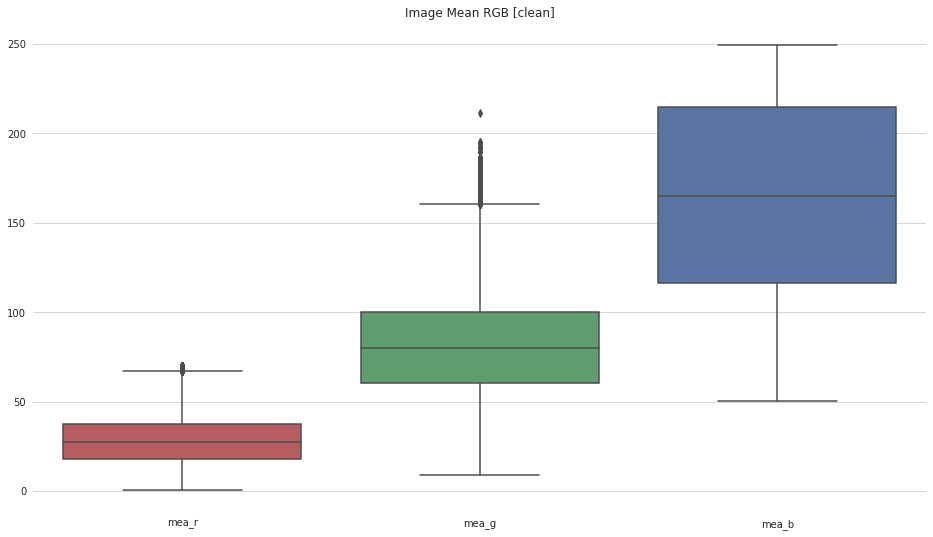

In [12]:
f, ax = plt.subplots(1, 1, figsize=(16,9))

sns.boxplot(data=keep[["mea_r","mea_g","mea_b"]])
ax.set_title("Image Mean RGB [clean]")
sns.despine(left=True, bottom=True)
f.savefig(abspath("./out/figures/stats_thr-mean-clean.png"))
f.savefig(abspath("./out/figures/stats_thr-mean-clean.svg"))

In [13]:
# Save a copy of the metadata with a quality label added to it
keep_set = set(keep.file)
ukbb["cleaned"] = ukbb["file"].apply(lambda x: x in keep_set)
ukbb.to_csv("./data/ukbb_metadata_quality.csv", index=False)